# Surprise Housing Advanced Regression Model

A US Real Estate Company called Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher 
price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
 

The company is looking at prospective properties to buy to enter the market. 
We will build a regression model using regularisation in order to predict the actual value of the 
prospective properties which will help Surprise Housing decide whether to invest in them or not.

 

What Surprise Housing wants to know:

1. Which variables are significant in predicting the price of a house

2. How well those variables describe the price of a house.

In [84]:
#Let us first of import all the Libraries needed

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor?

Object `variance_inflation_factor` not found.


### Reading and Understanding the Data

In [4]:
sh = pd.read_csv('/Users/nnelson/Downloads/train.csv')
sh.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
sh.shape

(1460, 81)

In [7]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### we have 1460 rows and 81 columns
We also see that there are some columns with missing or Null values
Let us fix the columns with Null Values First

In [8]:
# Lets see how many columns have Null Values and their count

sh[sh.columns[sh.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

##### There are a total of 19 Columns which contain Null Values in them. 
Some of them have large number of Null values
There are however 3 columns 2 out of which only have 8 Null Values and one has a single Null Value. 
Hence we will leave those 3 and delete the remaining Columns

In [10]:
# Removing the columns with Null Values.

sh.columns[sh.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [12]:
sh1 = sh.drop(['LotFrontage', 'Alley', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'], axis =1)

sh1[sh1.columns[sh1.isnull().any()]].isnull().sum()

MasVnrType    8
MasVnrArea    8
Electrical    1
dtype: int64

In [13]:
sh1 = sh1.dropna(subset = ['MasVnrType', 'MasVnrArea', 'Electrical'])

sh1[sh1.columns[sh1.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [14]:
sh1.shape

(1451, 65)

In [15]:
sh1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

In [16]:
# MSSubClass datatype is int64 however we know that its a categorical variable and the numerical value 
# is a code for different types of preperties. So we will change the datatype to object.

sh1['MSSubClass'] = sh1['MSSubClass'].astype(object)

## Visual Representation of the Data

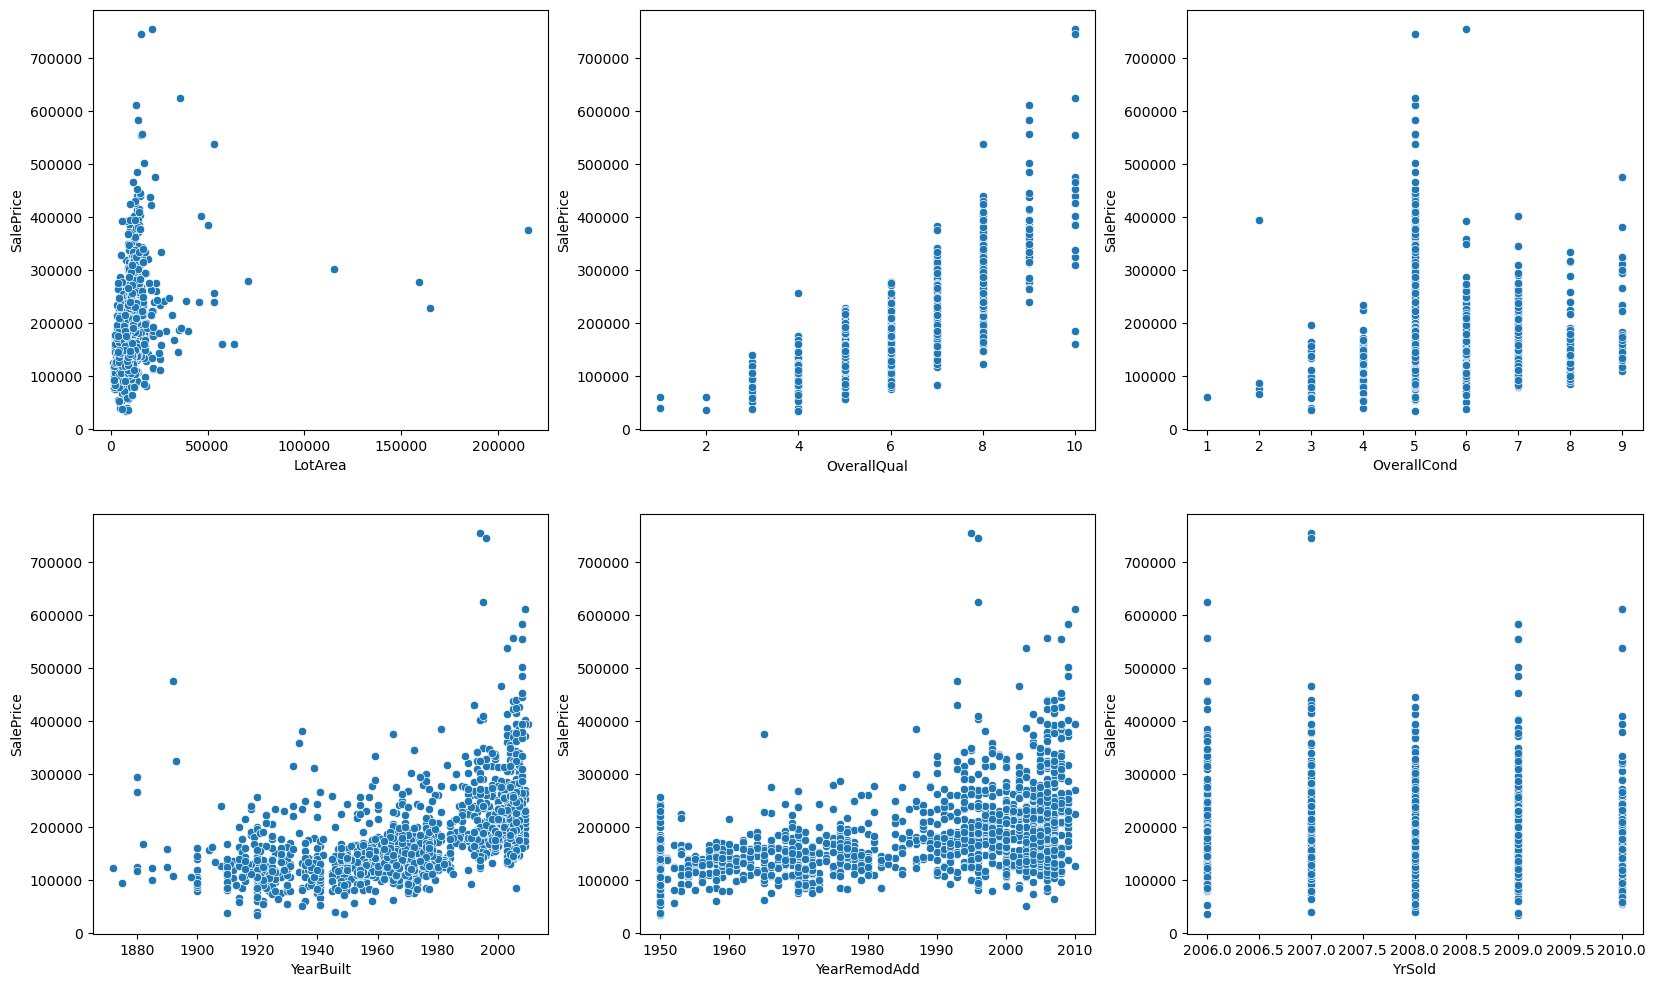

In [17]:
# Let see how some of the continuos numerical variables effect the Sales Price of the Property

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.scatterplot(data=sh1, x = 'LotArea', y = 'SalePrice')
plt.subplot(2,3,2)
sns.scatterplot(data=sh1, x = 'OverallQual', y = 'SalePrice')
plt.subplot(2,3,3)
sns.scatterplot(data=sh1, x = 'OverallCond', y = 'SalePrice')
plt.subplot(2,3,4)
sns.scatterplot(data=sh1, x = 'YearBuilt', y = 'SalePrice')
plt.subplot(2,3,5)
sns.scatterplot(data=sh1, x = 'YearRemodAdd', y = 'SalePrice')
plt.subplot(2,3,6)
sns.scatterplot(data=sh1, x = 'YrSold', y = 'SalePrice')
plt.show()

##### We see some sort of relationship between the Overall Quality, Year Built and Remodeled somewhat with the Price. apart from that the others dont show any significant patterns

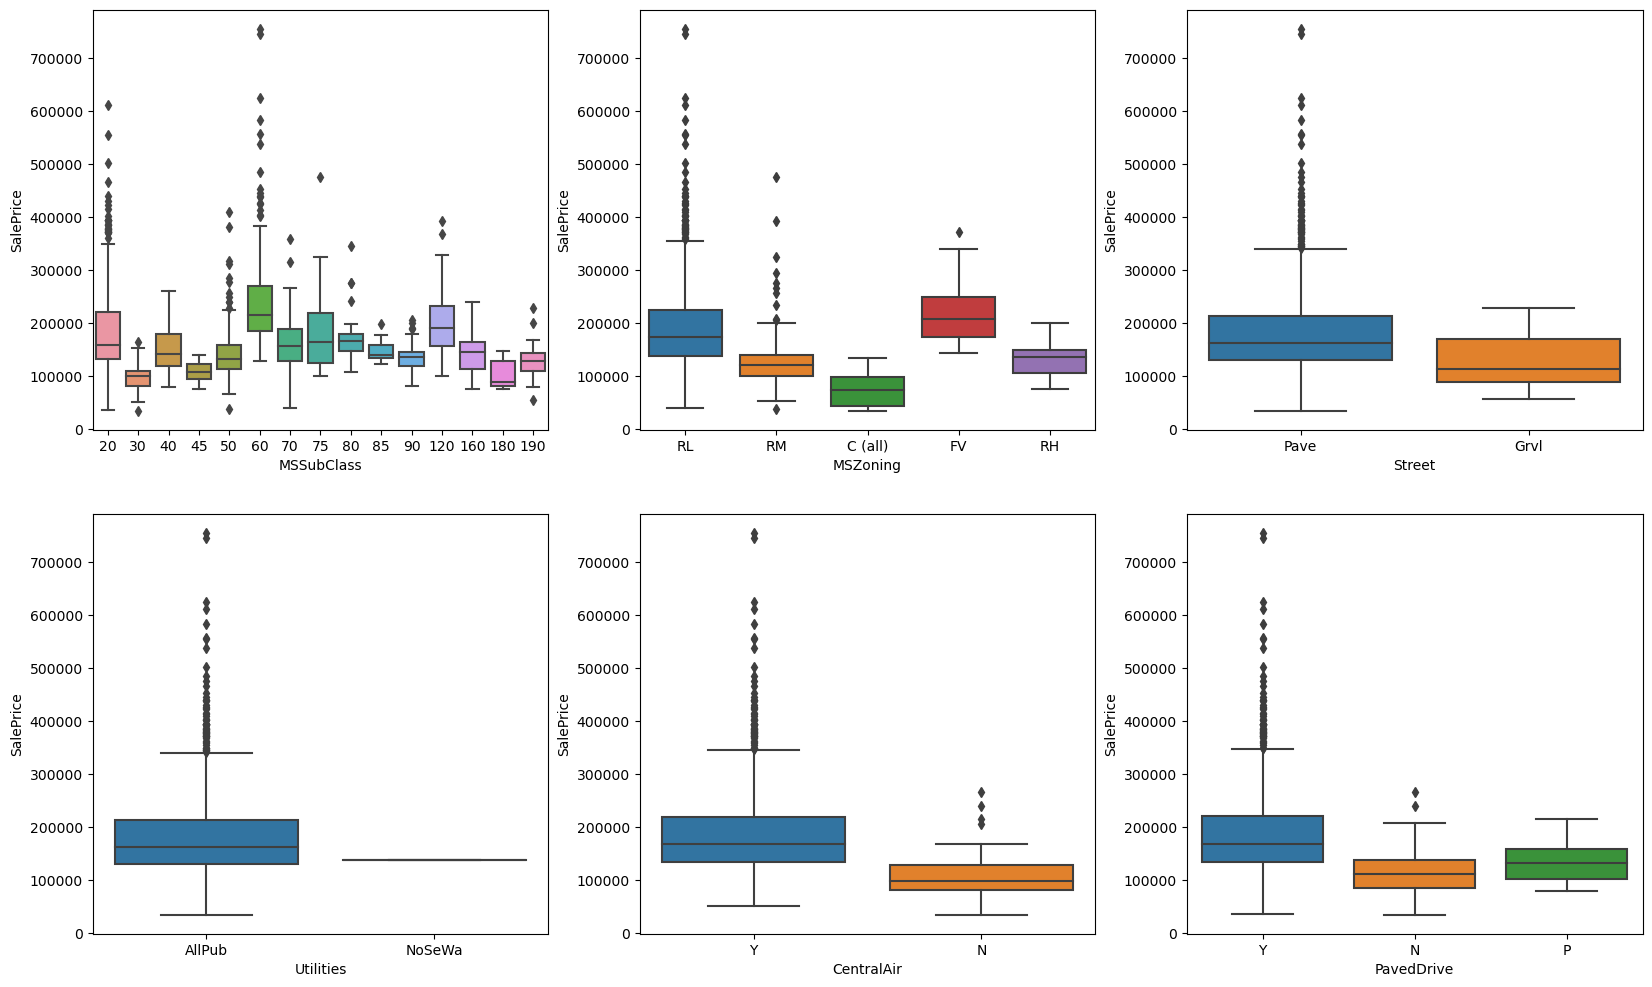

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = sh1)
plt.subplot(2,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = sh1)
plt.subplot(2,3,3)
sns.boxplot(x = 'Street', y = 'SalePrice', data = sh1)
plt.subplot(2,3,4)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = sh1)
plt.subplot(2,3,5)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = sh1)
plt.subplot(2,3,6)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = sh1)
plt.show()

##### Categorical Variables:
#### As seen from the graph above we see some significant impact of Paved Driveway, Street and Utilities alongwith Central Air on the Price of the property

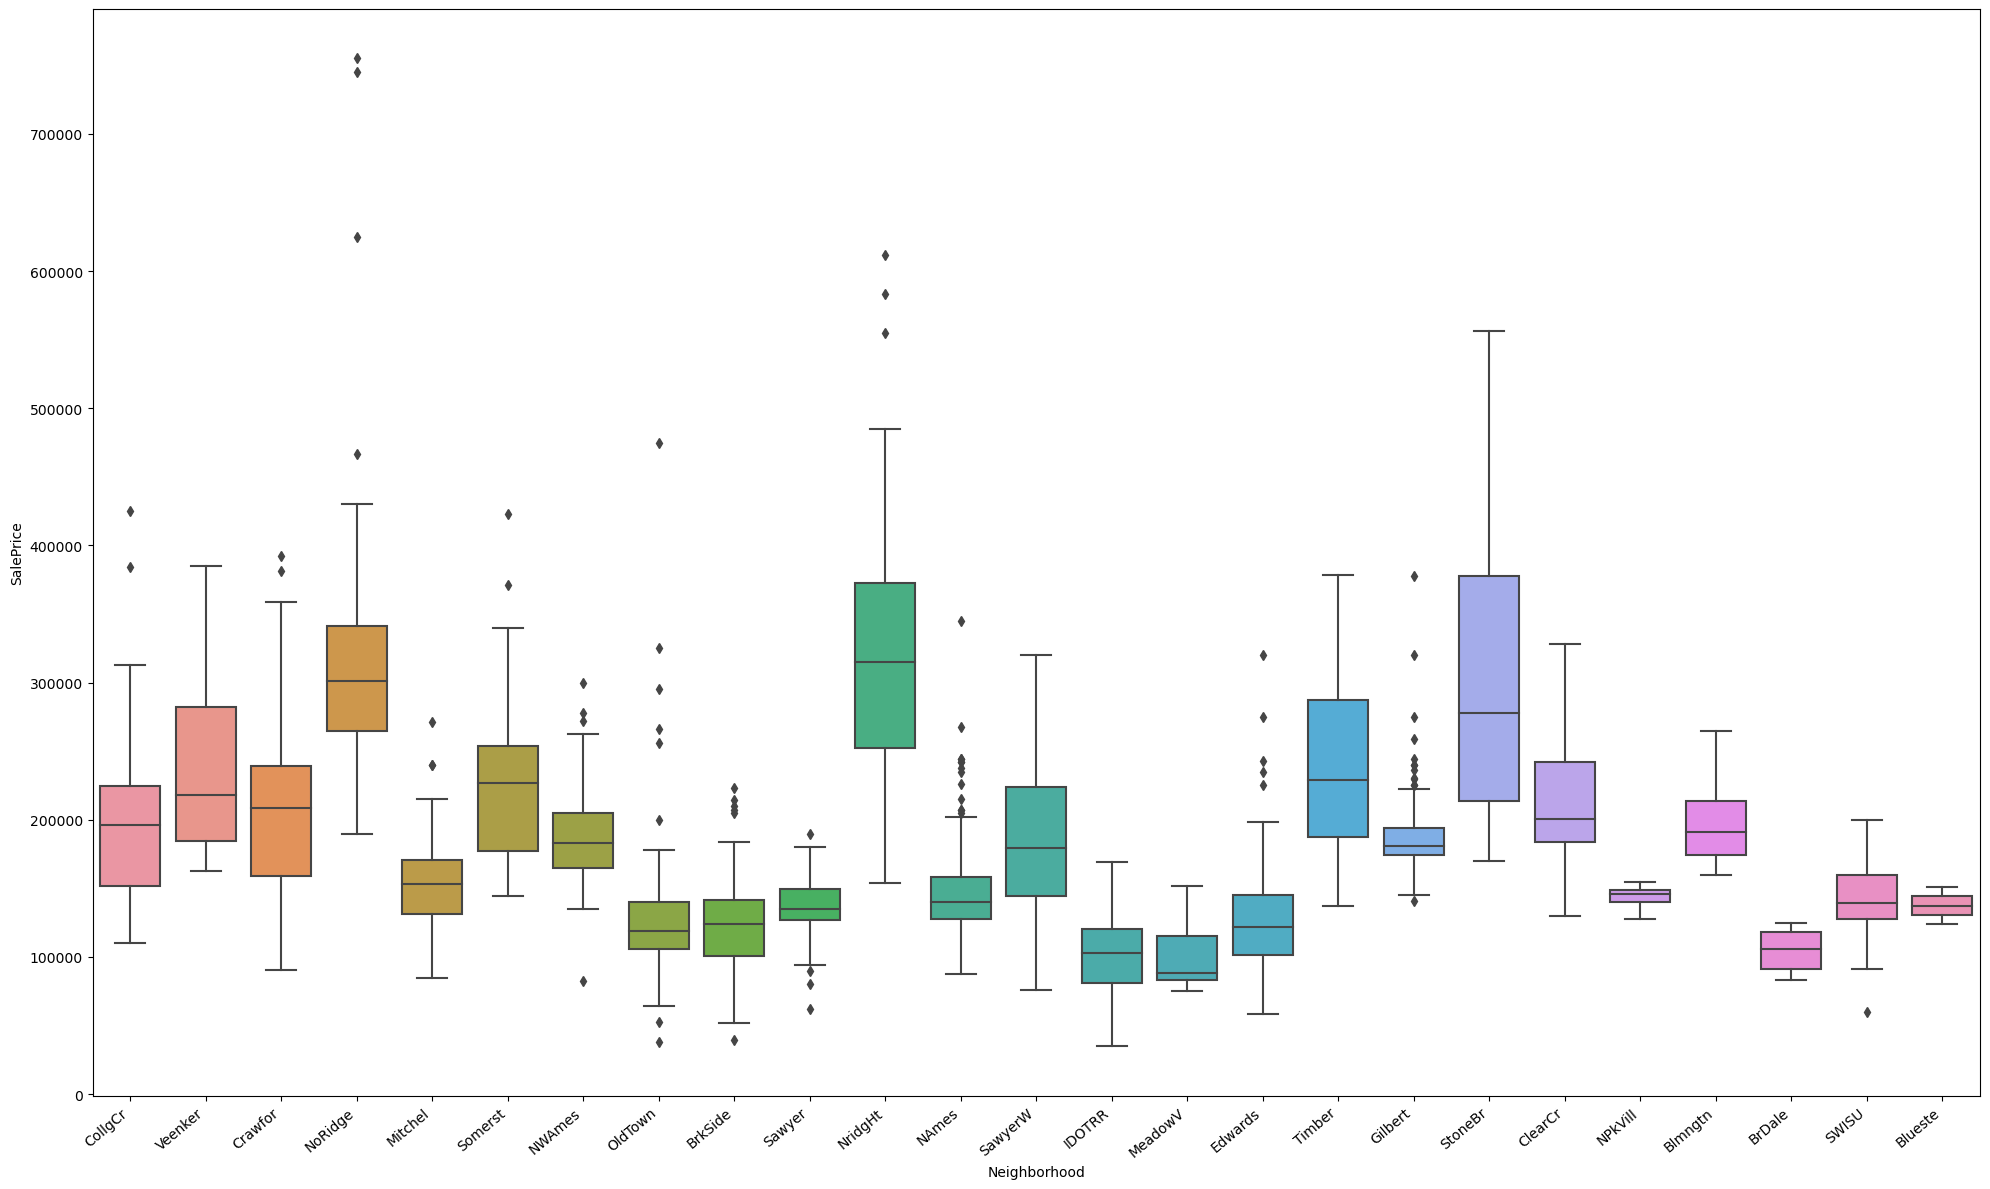

In [21]:
plt.figure(figsize=(20, 12))
ax = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = sh1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

##### As expected neighbourhood also effects the Sales price significantly. We can see in the figure above that some neighbourhoods show a significantly higher median price than several others 

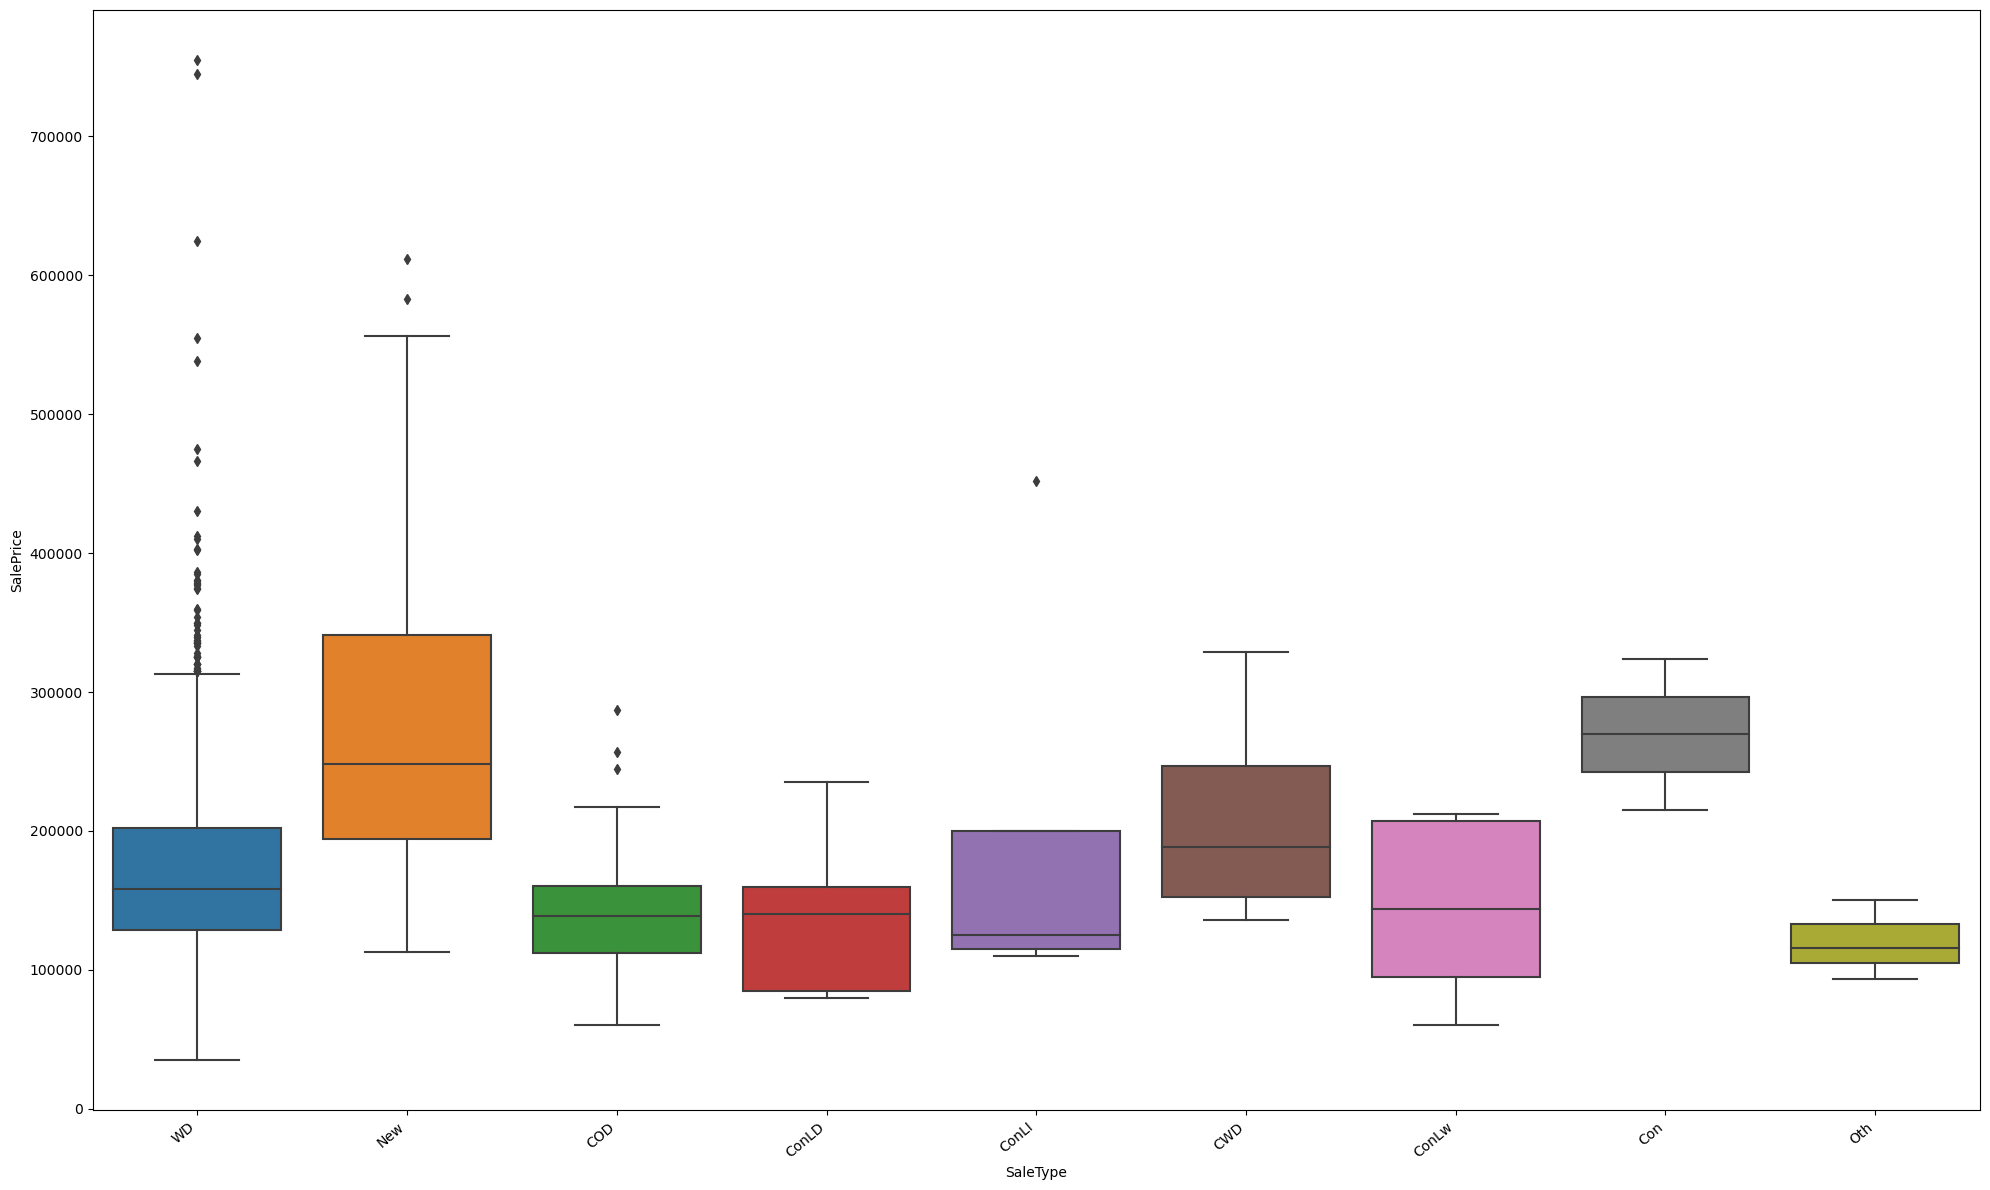

In [22]:
plt.figure(figsize=(20, 12))
ax = sns.boxplot(x = 'SaleType', y = 'SalePrice', data = sh1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

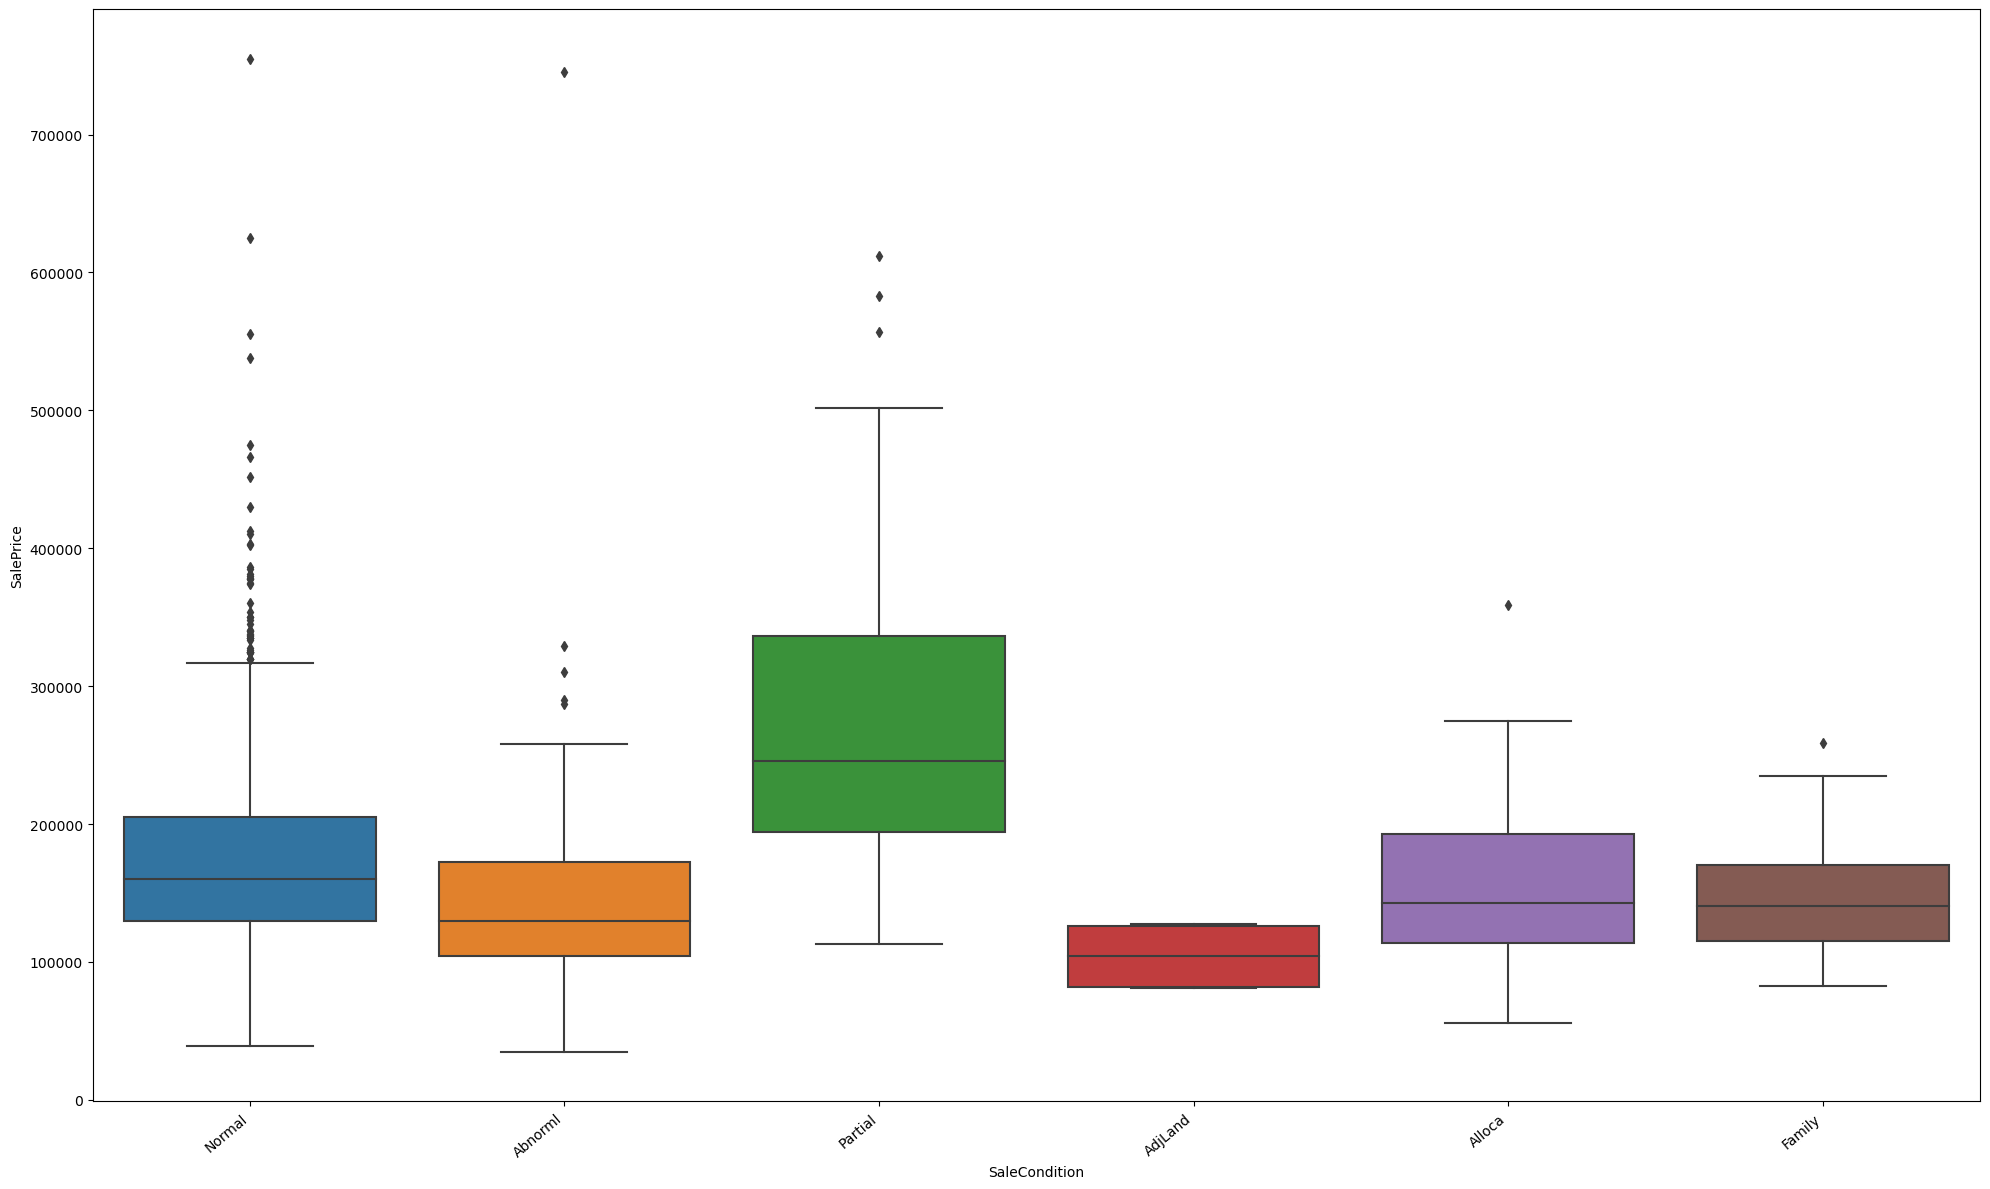

In [24]:
plt.figure(figsize=(20, 12))
ax = sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = sh1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

##### One thing that we can notice in both the graphs is that Newer Properties tend be carrying higher property sprice as compared to the rest

## Data Preparation

In [25]:
sh1 = sh1.replace({'MoSold' : { 1 : 'jan', 2 : 'feb', 3 : 'mar', 4 : 'apr', 5 : 'may', 6 : 'jun', 7 : 'jul', 8 : 'aug', 9 : 'sep', 10 : 'oct', 1 : 'nov', 12 : 'dec' }})
sh1['MoSold'].value_counts()

jun    253
jul    234
may    201
apr    141
aug    121
mar    104
oct     89
11      78
sep     62
dec     58
nov     58
feb     52
Name: MoSold, dtype: int64

In [27]:
sh1.describe()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,46.838043,567.197105,...,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,2007.815300,180624.101999
std,421.737858,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,161.777324,442.209192,...,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,1.329376,79312.128273
min,1.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,364.500000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,0.000000,222.000000,...,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129900.000000
50%,729.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,479.000000,...,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,162500.000000
75%,1094.500000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1460.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [29]:
# all numeric (float and int) variables in the dataset
data_numeric = sh1.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,1,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,2,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,3,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,4,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,5,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [30]:
data_numeric.columns

Index(['Id', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

In [31]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   LotArea        1451 non-null   int64  
 2   OverallQual    1451 non-null   int64  
 3   OverallCond    1451 non-null   int64  
 4   YearBuilt      1451 non-null   int64  
 5   YearRemodAdd   1451 non-null   int64  
 6   MasVnrArea     1451 non-null   float64
 7   BsmtFinSF1     1451 non-null   int64  
 8   BsmtFinSF2     1451 non-null   int64  
 9   BsmtUnfSF      1451 non-null   int64  
 10  TotalBsmtSF    1451 non-null   int64  
 11  1stFlrSF       1451 non-null   int64  
 12  2ndFlrSF       1451 non-null   int64  
 13  LowQualFinSF   1451 non-null   int64  
 14  GrLivArea      1451 non-null   int64  
 15  BsmtFullBath   1451 non-null   int64  
 16  BsmtHalfBath   1451 non-null   int64  
 17  FullBath       1451 non-null   int64  
 18  HalfBath

In [32]:
# correlation matrix
cor = data_numeric.corr()
cor

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
Id,1.000000,-0.032789,-0.032075,0.013595,-0.016378,-0.025398,-0.049736,-0.006218,-0.005213,-0.007841,...,0.015772,-0.028217,-0.005435,0.004939,-0.046455,0.002058,0.057388,-0.006025,0.002630,-0.025188
LotArea,-0.032789,1.000000,0.106305,-0.002297,0.015708,0.015190,0.104141,0.213081,0.111674,-0.004250,...,0.180767,0.173170,0.086278,-0.023114,0.020568,0.043498,0.077885,0.038221,-0.012969,0.264668
OverallQual,-0.032075,0.106305,1.000000,-0.090940,0.572129,0.550499,0.411699,0.236421,-0.058211,0.309461,...,0.560502,0.240728,0.303215,-0.113176,0.030972,0.066271,0.065720,-0.031183,-0.025116,0.790085
OverallCond,0.013595,-0.002297,-0.090940,1.000000,-0.376557,0.075545,-0.128333,-0.042292,0.039234,-0.137104,...,-0.151204,-0.004514,-0.031432,0.074612,0.025123,0.053925,-0.002254,0.068617,0.043487,-0.076361
YearBuilt,-0.016378,0.015708,0.572129,-0.376557,1.000000,0.590324,0.316345,0.250209,-0.047609,0.150218,...,0.478948,0.226960,0.185758,-0.386748,0.032145,-0.048977,0.005368,-0.033994,-0.014559,0.523274
YearRemodAdd,-0.025398,0.015190,0.550499,0.075545,0.590324,1.000000,0.180136,0.128422,-0.066485,0.182219,...,0.371088,0.207514,0.224140,-0.192185,0.046012,-0.037471,0.006198,-0.009866,0.035263,0.507488
MasVnrArea,-0.049736,0.104141,0.411699,-0.128333,0.316345,0.180136,1.000000,0.264469,-0.072443,0.114298,...,0.372990,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.008147,0.477486
BsmtFinSF1,-0.006218,0.213081,0.236421,-0.042292,0.250209,0.128422,0.264469,1.000000,-0.049498,-0.496605,...,0.295374,0.205447,0.107279,-0.105887,0.026926,0.063139,0.141361,0.003852,0.016969,0.383995
BsmtFinSF2,-0.005213,0.111674,-0.058211,0.039234,-0.047609,-0.066485,-0.072443,-0.049498,1.000000,-0.209806,...,-0.017641,0.067684,0.004155,0.036680,-0.030211,0.088430,0.041597,0.004784,0.031880,-0.010350
BsmtUnfSF,-0.007841,-0.004250,0.309461,-0.137104,0.150218,0.182219,0.114298,-0.496605,-0.209806,1.000000,...,0.183865,-0.004180,0.130046,-0.003787,0.020825,-0.012585,-0.035168,-0.023884,-0.040340,0.215707


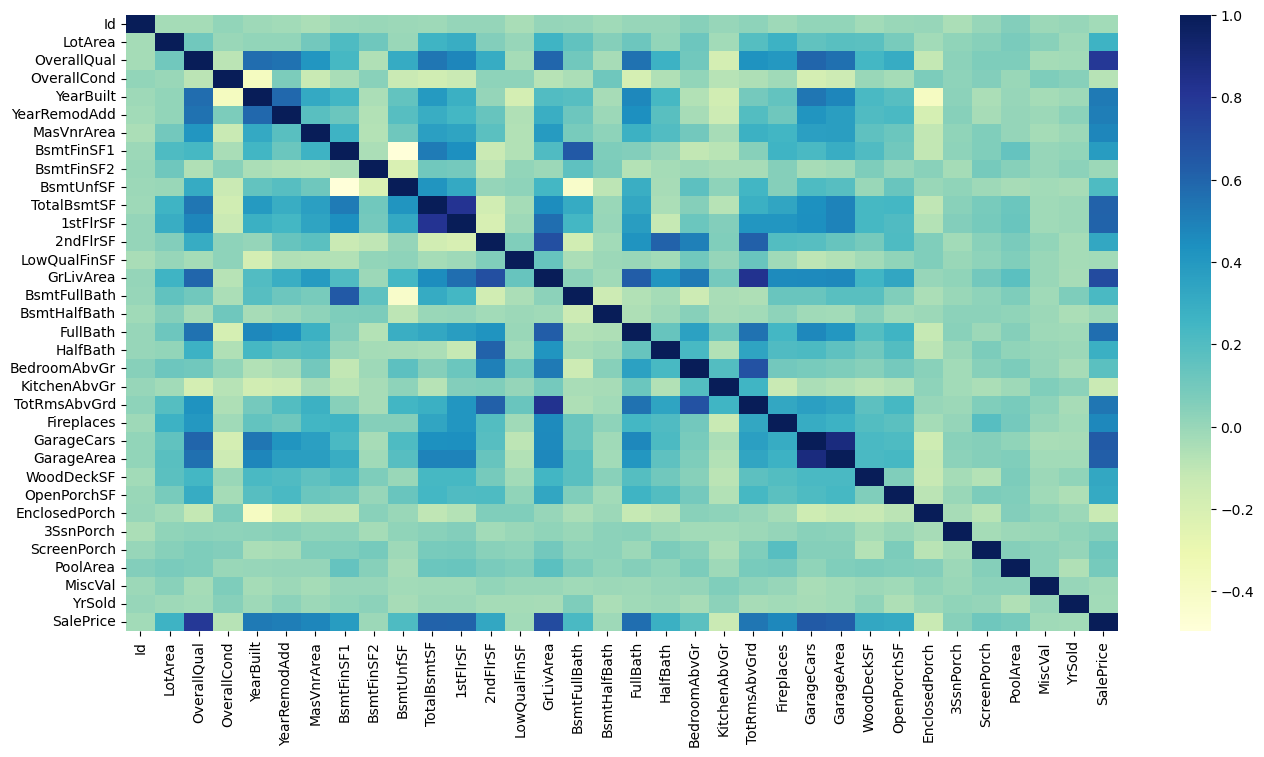

In [33]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

The heatmap shows some useful insights:

Correlation of Sale Price with independent variables:

Price is highly (positively) correlated with Overall Quality, Gr Living Area, 1st Flr SF, Total Basement SF, Garage Area, Garage Cars, Total Rooms above Ground.

Correlation among independent variables:

Many independent variables are highly correlated : Year Built, Year Remodelled, Garage Cars, Garage Area, Ground Living Area, Total Rooms etc

Thus, while building the model, we'll have to pay attention to multicollinearity

In [36]:
sh1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   object 
 2   MSZoning       1451 non-null   object 
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

In [40]:
varlist =  ['LotShape', 'Utilities', 'ExterQual', 'ExterCond', 
           'HeatingQC', 'KitchenQual', 'Functional',
          'PavedDrive']

# Defining the map function
def binary_map(x):
    return x.map({ 'IR3' : 0, 'IR2':1, 'IR1':2, 'Reg':3,
                 'ELO':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3,
                 'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4,
                 'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6,
                 'N':0, 'P':1, 'Y':2,
                 'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})


# Applying the function to the bike sharing dataset
sh2[varlist] = sh1[varlist].apply(binary_map)

In [41]:
sh2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   object 
 2   MSZoning       1451 non-null   object 
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   int64  
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   int64  
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

In [42]:
# all numeric (float and int) variables in the dataset
data_numeric = sh1.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,LotArea,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,1,8450,3,3,7,5,2003,2003,196.0,3,...,2,0,61,0,0,0,0,0,2008,208500
1,2,9600,3,3,6,8,1976,1976,0.0,2,...,2,298,0,0,0,0,0,0,2007,181500
2,3,11250,2,3,7,5,2001,2002,162.0,3,...,2,0,42,0,0,0,0,0,2008,223500
3,4,9550,2,3,7,5,1915,1970,0.0,2,...,2,0,35,272,0,0,0,0,2006,140000
4,5,14260,2,3,8,5,2000,2000,350.0,3,...,2,192,84,0,0,0,0,0,2008,250000


In [43]:
data_numeric.columns

Index(['Id', 'LotArea', 'LotShape', 'Utilities', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

In [44]:
# correlation matrix
cor = data_numeric.corr()
cor

,Id,LotArea,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
Id,1.000000,-0.032789,0.022440,-0.013431,-0.032075,0.013595,-0.016378,-0.025398,-0.049736,0.002635,...,0.005213,-0.028217,-0.005435,0.004939,-0.046455,0.002058,0.057388,-0.006025,0.002630,-0.025188
LotArea,-0.032789,1.000000,-0.315440,-0.010166,0.106305,-0.002297,0.015708,0.015190,0.104141,0.054527,...,0.014904,0.173170,0.086278,-0.023114,0.020568,0.043498,0.077885,0.038221,-0.012969,0.264668
LotShape,0.022440,-0.315440,1.000000,0.026614,-0.202365,0.033236,-0.233890,-0.179205,-0.088926,-0.192177,...,-0.104442,-0.163233,-0.096001,0.098587,-0.033635,-0.064784,-0.047054,-0.028518,0.035850,-0.271595
Utilities,-0.013431,-0.010166,0.026614,1.000000,0.001782,-0.009919,0.011392,0.034041,-0.063424,0.017983,...,-0.007635,0.019773,-0.028464,0.009437,0.003065,-0.102345,0.001810,0.002310,-0.023411,0.014284
OverallQual,-0.032075,0.106305,-0.202365,0.001782,1.000000,-0.090940,0.572129,0.550499,0.411699,0.724739,...,0.229243,0.240728,0.303215,-0.113176,0.030972,0.066271,0.065720,-0.031183,-0.025116,0.790085
OverallCond,0.013595,-0.002297,0.033236,-0.009919,-0.090940,1.000000,-0.376557,0.075545,-0.128333,-0.136010,...,-0.061299,-0.004514,-0.031432,0.074612,0.025123,0.053925,-0.002254,0.068617,0.043487,-0.076361
YearBuilt,-0.016378,0.015708,-0.233890,0.011392,0.572129,-0.376557,1.000000,0.590324,0.316345,0.597431,...,0.427487,0.226960,0.185758,-0.386748,0.032145,-0.048977,0.005368,-0.033994,-0.014559,0.523274
YearRemodAdd,-0.025398,0.015190,-0.179205,0.034041,0.550499,0.075545,0.590324,1.000000,0.180136,0.586872,...,0.167488,0.207514,0.224140,-0.192185,0.046012,-0.037471,0.006198,-0.009866,0.035263,0.507488
MasVnrArea,-0.049736,0.104141,-0.088926,-0.063424,0.411699,-0.128333,0.316345,0.180136,1.000000,0.351350,...,0.145314,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.008147,0.477486
ExterQual,0.002635,0.054527,-0.192177,0.017983,0.724739,-0.136010,0.597431,0.586872,0.351350,1.000000,...,0.211157,0.209883,0.286959,-0.150942,0.037904,0.014536,0.035411,-0.038954,-0.005348,0.681200


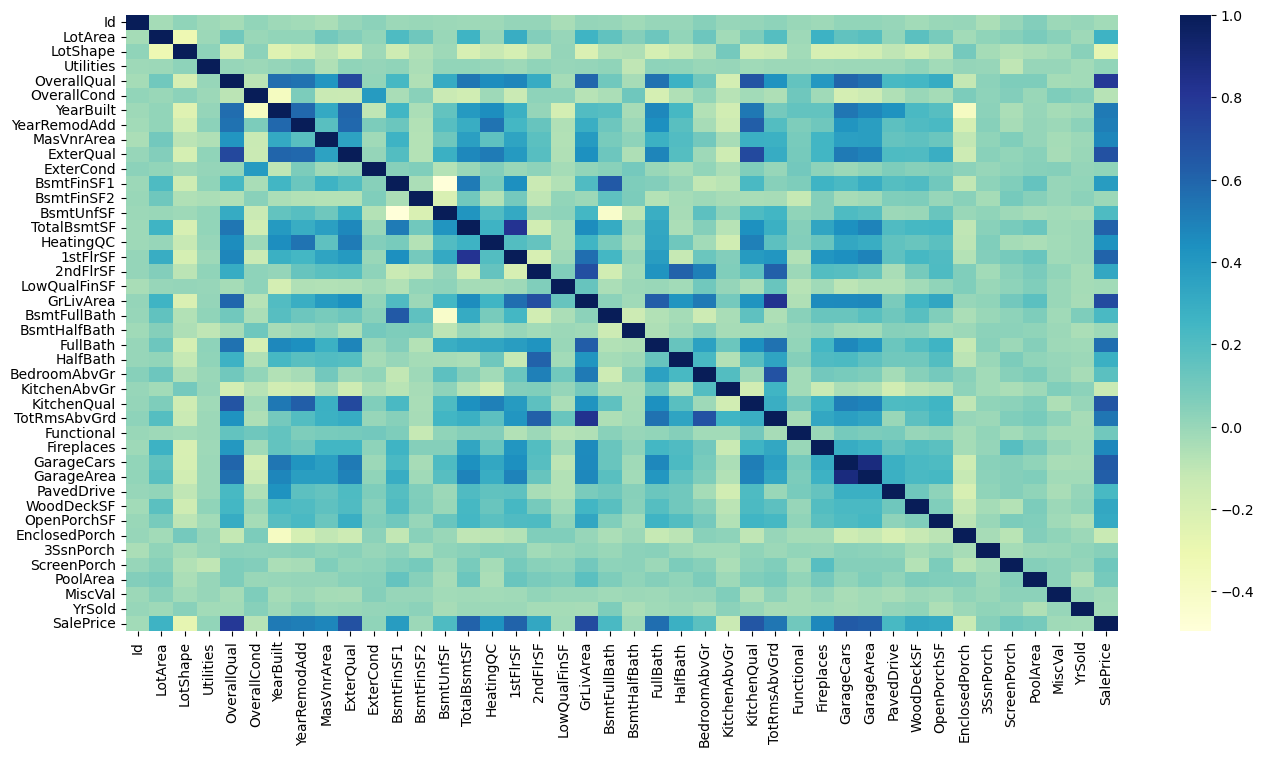

In [45]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

## Creating Dummy Variables

In [46]:
# creating dummy variables for categorical variables

# subset all categorical variables
data_categorical = sh2.select_dtypes(include=['object'])
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1451 non-null   object
 1   MSZoning       1451 non-null   object
 2   Street         1451 non-null   object
 3   LandContour    1451 non-null   object
 4   LotConfig      1451 non-null   object
 5   LandSlope      1451 non-null   object
 6   Neighborhood   1451 non-null   object
 7   Condition1     1451 non-null   object
 8   Condition2     1451 non-null   object
 9   BldgType       1451 non-null   object
 10  HouseStyle     1451 non-null   object
 11  RoofStyle      1451 non-null   object
 12  RoofMatl       1451 non-null   object
 13  Exterior1st    1451 non-null   object
 14  Exterior2nd    1451 non-null   object
 15  MasVnrType     1451 non-null   object
 16  Foundation     1451 non-null   object
 17  Heating        1451 non-null   object
 18  CentralAir     1451 non-null

In [47]:
# convert into dummies
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [48]:
# drop categorical variables 
sh3 = sh2.drop(list(data_categorical.columns), axis=1)

In [49]:
# concat dummy variables with X
sh3 = pd.concat([sh3, data_dummies], axis=1)

In [51]:
sh3.columns

Index(['Id', 'LotArea', 'LotShape', 'Utilities', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=203)

In [52]:
sh3.shape

(1451, 203)

## Linear Relationship

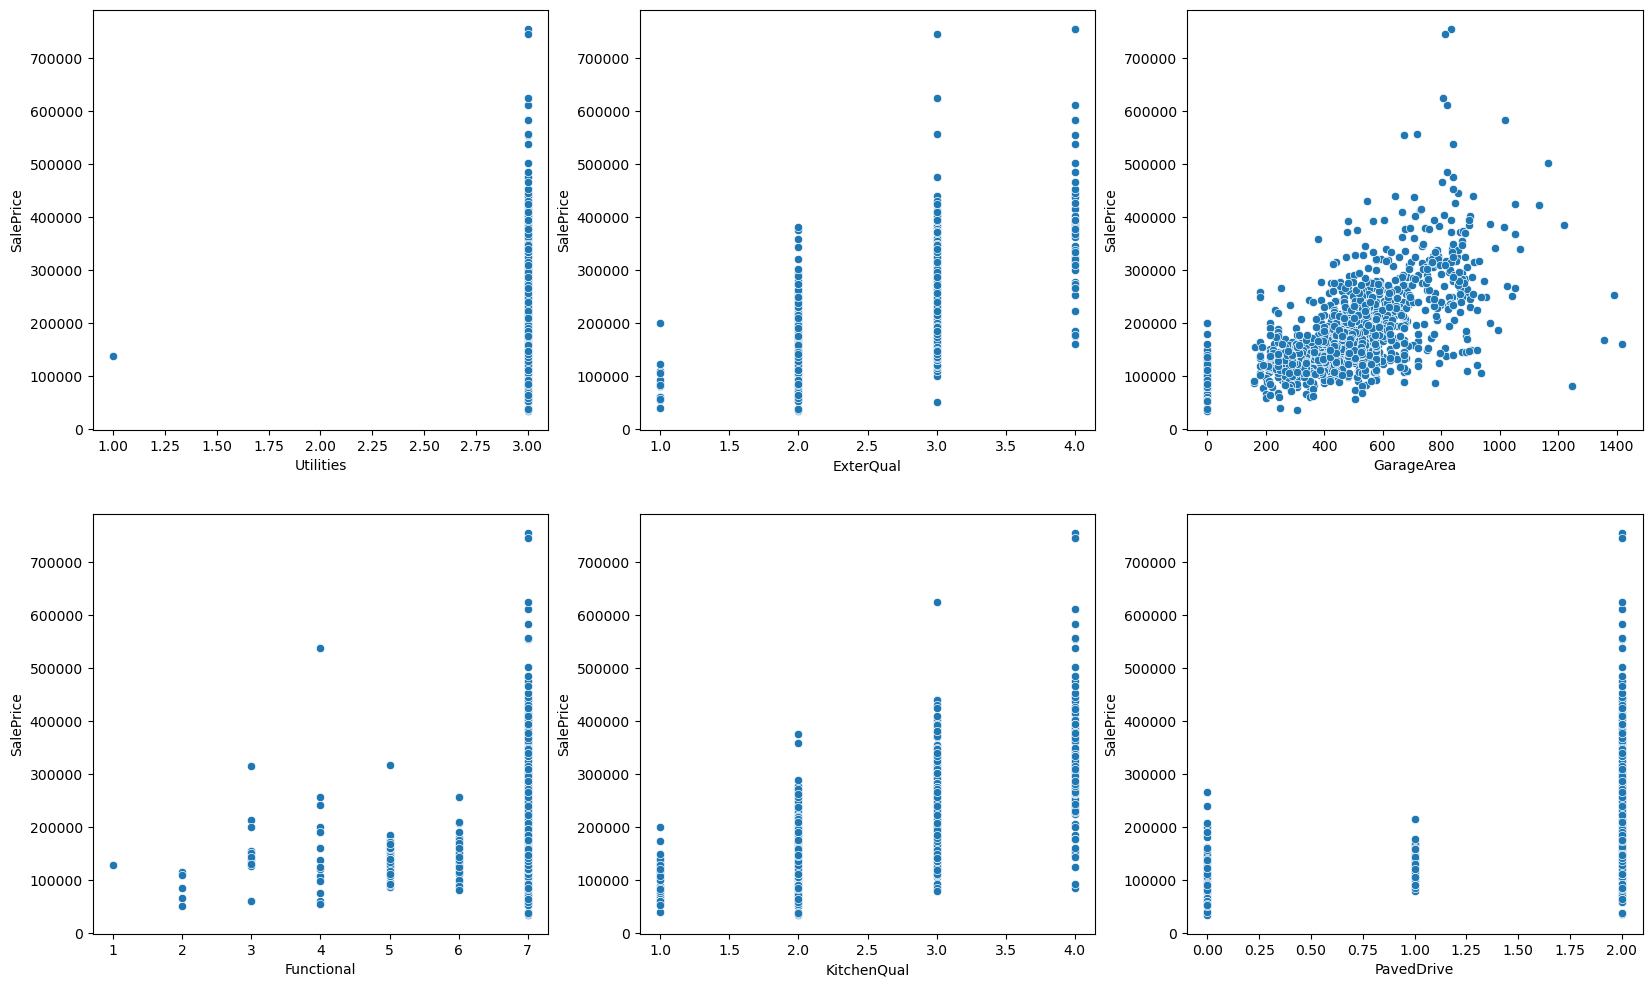

In [53]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.scatterplot(data=sh3, x = 'Utilities', y = 'SalePrice')
plt.subplot(2,3,2)
sns.scatterplot(data=sh3, x = 'ExterQual', y = 'SalePrice')
plt.subplot(2,3,3)
sns.scatterplot(data=sh3, x = 'GarageArea', y = 'SalePrice')
plt.subplot(2,3,4)
sns.scatterplot(data=sh3, x = 'Functional', y = 'SalePrice')
plt.subplot(2,3,5)
sns.scatterplot(data=sh3, x = 'KitchenQual', y = 'SalePrice')
plt.subplot(2,3,6)
sns.scatterplot(data=sh3, x = 'PavedDrive', y = 'SalePrice')
plt.show()

These are the Variables which were listed as categorical but we changed them into numeric variables based on the inputs and we can clearly see a trend that Sales Price increases as the quality and amenities increases

## Dividing into X and Y

In [73]:
y = sh3.pop('SalePrice')
X = sh3

In [74]:
y.shape

(1451,)

In [75]:
X.shape

(1451, 202)

In [78]:
## Scaling the Data

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'LotArea', 'LotShape', 'Utilities', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=202)

In [79]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [80]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [81]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-46509914413589.42
[ 2.58578778e+02  7.57914008e+03 -3.75865442e+02  3.56455819e+02
  1.38236544e+04  5.42736539e+03  7.76927944e+03  1.28884425e+03
  5.42282946e+03  2.41986948e+03 -3.48332826e+02 -6.24019655e+15
 -2.21693108e+15 -6.05985608e+15  6.00100484e+15  5.42858675e+02
  2.44641995e+15  2.77335320e+15  3.09908918e+14 -3.34108566e+15
  4.79572503e+02 -8.17822375e+02 -1.11964078e+03  9.83185529e+01
 -6.03753128e+03 -4.79922867e+03  3.51092493e+03  2.51155513e+03
  5.08569366e+03  7.26192346e+02  5.91439449e+03 -8.32909987e+02
  4.75211607e+02  1.08176794e+03  7.08828875e+02 -1.30447591e+02
  1.26509831e+03  1.23459271e+03  2.62519022e+03 -9.60546372e+02
  5.61652996e+02 -3.96879957e+02 -1.05155229e+02  1.91654750e+02
  1.75786093e+03  4.15311081e+03  8.55997547e+02 -2.20056381e+02
  8.95315022e+02  1.30328077e+03  5.55483747e+15 -3.94335139e+03
 -1.30950114e+03  5.73140529e+02 -2.60015642e+03  8.80842237e+03
  5.50582846e+03  1.63622033e+04  1.00905764e+04  1.33795561e+03
  2.22

In [82]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9300621821919153
-1.7238664434958782e+21
444664938805.4829
4.759166950926115e+33
438093535.7689487
1.0915520529647054e+31


## Ridge Regression

In [85]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [87]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-6.28717983e+02  2.91650352e+03 -6.44050184e+02  8.05469449e+02
  9.31749748e+03  2.37461142e+03  1.95477500e+03  2.40460847e+03
  4.15779944e+03  4.47588965e+03  4.96524044e+02  3.69936770e+03
  1.71361767e+02 -5.33249230e+02  3.37164620e+03  1.82591379e+03
  5.68732233e+03  4.26286278e+03  1.71775856e+02  7.71881972e+03
  3.23543147e+03 -4.36828693e+02  3.63111422e+03  2.20865283e+03
  4.74253974e+01 -2.15226537e+03  4.87480797e+03  5.12026448e+03
  2.46975584e+03  3.91280676e+03  5.18596529e+03  2.80002104e+03
  7.10388275e+02  2.63574518e+03  1.06083992e+03 -1.15327519e+02
  1.04105061e+03  1.78938639e+03  4.09957759e+02 -2.82096318e+02
 -7.38182103e+01 -5.70501977e+02  2.19059769e+02 -8.97393381e+01
 -1.36300468e+02  8.78210018e+02  1.63151827e+02  7.84719950e+02
 -2.37168018e+02 -3.64481951e+02 -5.78242510e+02 -1.30072302e+03
 -2.18322150e+03  2.45418666e+02 -4.23268478e+02  6.00558707e+02
  6.60282693e+02  1.33966054e+03 -1.15117696e+03  1.05647648e+03
  2.66631350e+03  8.00644

In [88]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8710696006981643
0.8443298757144525
819740019241.6334
429766536463.18854
807625634.7208211
985703065.2825425


## Lasso Regression

In [89]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [91]:
#Fitting Lasso model for alpha = 500 

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [93]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9275038643573169
0.6637601825158279
460930734322.4136
928274596326.0156
454118950.0713434
2129070175.0596688


In [94]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.300622e-01,8.710696e-01,9.275039e-01
1,R2 Score (Test),-1.723866e+21,8.443299e-01,6.637602e-01
2,RSS (Train),4.446649e+11,8.197400e+11,4.609307e+11
3,RSS (Test),4.759167e+33,4.297665e+11,9.282746e+11
4,MSE (Train),2.093068e+04,2.841875e+04,2.131007e+04
5,MSE (Test),3.303864e+15,3.139591e+04,4.614185e+04


## Changes in the coefficients after regularization

In [95]:
betas = pd.DataFrame(index=X.columns)

In [96]:
betas.rows = X.columns

In [97]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [100]:
pd.set_option('display.max_rows', None)
betas.head(203)

,Linear,Ridge,Lasso
Id,2.585788e+02,-6.287180e+02,0.000000
LotArea,7.579140e+03,2.916504e+03,6620.284736
LotShape,-3.758654e+02,-6.440502e+02,-241.898495
Utilities,3.564558e+02,8.054694e+02,548.450530
OverallQual,1.382365e+04,9.317497e+03,14462.801969
OverallCond,5.427365e+03,2.374611e+03,5119.212778
YearBuilt,7.769279e+03,1.954775e+03,6534.246627
YearRemodAdd,1.288844e+03,2.404608e+03,1063.367294
MasVnrArea,5.422829e+03,4.157799e+03,5407.164487
ExterQual,2.419869e+03,4.475890e+03,2649.484503
